In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df_auto = pd.read_csv("/data/renhaoye/decals_2022/fits.csv")

In [3]:
threshold = 0.5
threshold2 = 0.6
merger = major = df_auto.query('merging_minor_disturbance_fraction > %f '
                               '| merging_major_disturbance_fraction > %f '
                               '| merging_merger_fraction > %f '
                               % (threshold2, threshold2, threshold2))
smoothRounded = df_auto.query('smooth_or_featured_smooth_fraction >  %f '
                       '& how_rounded_round_fraction > %f' % (0.7, 0.8))
smoothInBetween = df_auto.query('smooth_or_featured_smooth_fraction >  %f '
                       '& how_rounded_in_between_fraction > %f' % (0.7, 0.85))
smoothCigarShaped = df_auto.query('smooth_or_featured_smooth_fraction > %f '
                                  '& how_rounded_cigar_shaped_fraction > %f' % (threshold, threshold2))
edgeOn = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
                            '& disk_edge_on_yes_fraction > %f'
                            % (threshold, 0.7))
diskNoBar = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
                                '& disk_edge_on_no_fraction > %f '
                                '& bar_no_fraction > %f '
                                % (threshold, threshold, 0.7))
diskStrongBar = df_auto.query('smooth_or_featured_featured_or_disk_fraction > %f '
                                '& disk_edge_on_no_fraction > %f '
                                '&bar_strong_fraction > %f '
                                % (threshold, threshold, threshold2))
merger_train, merger_test = train_test_split(merger, test_size=0.1, random_state=1926)
merger_train, merger_valid = train_test_split(merger_train, test_size=0.1, random_state=1926)

smoothRounded_train, smoothRounded_test = train_test_split(smoothRounded, test_size=0.1, random_state=1926)
smoothRounded_train, smoothRounded_valid = train_test_split(smoothRounded_train, test_size=0.1, random_state=1926)

smoothInBetween_train, smoothInBetween_test = train_test_split(smoothInBetween, test_size=0.1, random_state=1926)
smoothInBetween_train, smoothInBetween_valid = train_test_split(smoothInBetween_train, test_size=0.1, random_state=1926)

smoothCigarShaped_train, smoothCigarShaped_test = train_test_split(smoothCigarShaped, test_size=0.1, random_state=1926)
smoothCigarShaped_train, smoothCigarShaped_valid = train_test_split(smoothCigarShaped_train, test_size=0.1, random_state=1926)

edgeOn_train, edgeOn_test = train_test_split(edgeOn, test_size=0.1, random_state=1926)
edgeOn_train, edgeOn_valid = train_test_split(edgeOn_train, test_size=0.1, random_state=1926)

diskNoBar_train, diskNoBar_test = train_test_split(diskNoBar, test_size=0.1, random_state=1926)
diskNoBar_train, diskNoBar_valid = train_test_split(diskNoBar_train, test_size=0.1, random_state=1926)

diskStrongBar_train, diskStrongBar_test = train_test_split(diskStrongBar, test_size=0.1, random_state=1926)
diskStrongBar_train, diskStrongBar_valid = train_test_split(diskStrongBar_train, test_size=0.1, random_state=1926)

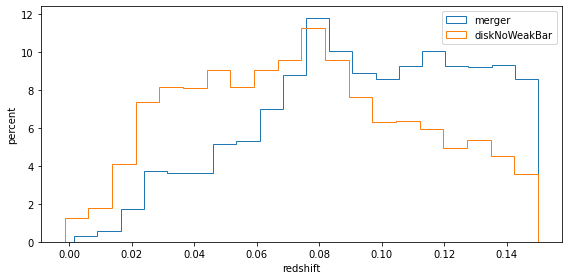

In [4]:
plt.figure(figsize=(8, 4))
plt.hist(merger.redshift, histtype="step", label = "merger", bins=20, density=True)
# plt.hist(smoothRounded.redshift, histtype="step", label = "smoothRounded", bins=20,density=True)
# plt.hist(smoothInBetween.redshift, histtype="step", label = "smoothInBetween", bins=20,density=True)
# plt.hist(smoothCigarShaped.redshift, histtype="step", label = "smoothCigarShaped", bins=20,density=True)
# plt.hist(edgeOn.redshift, histtype="step", label = "edgeOn", bins=20,density=True)
plt.hist(diskNoBar.redshift, histtype="step", label = "diskNoWeakBar", bins=20, density=True)
# plt.hist(diskStrongBar.redshift, histtype="step", label = "diskStrongBar", bins=20,density=True)
plt.xlabel("redshift")
plt.ylabel("percent")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [5]:
decals_df = pd.read_csv("/data/renhaoye/decals_2022/dataset_decals.csv", index_col=0)
sdss_df = pd.read_csv("/data/renhaoye/decals_2022/dataset_sdss_match_decals.csv", index_col=0)

decals_dataset = [decals_df.query("func == 'train'"), decals_df.query("func == 'test'"), decals_df.query("func == 'valid'")]
sdss_dataset = [sdss_df.query("func == 'train'"), sdss_df.query("func == 'test'"), sdss_df.query("func == 'valid'")]

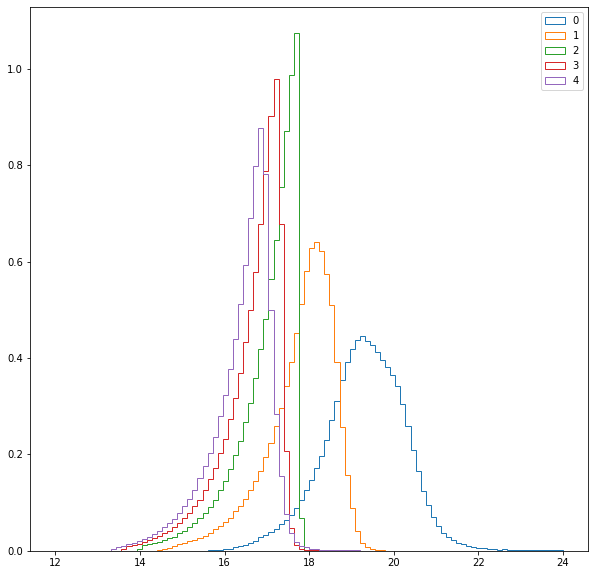

In [64]:
plt.figure(figsize=(10, 10))
plt.hist(a, density=True, bins=100, histtype="step", range=(12, 24), label="0")
plt.hist(b, density=True, bins=100, histtype="step", range=(12, 24), label="1")
plt.hist(c, density=True, bins=100, histtype="step", range=(12, 24), label="2")
plt.hist(d, density=True, bins=100, histtype="step", range=(12, 24), label="3")
plt.hist(e, density=True, bins=100, histtype="step", range=(12, 24), label="4")
plt.legend(fontsize=10)
plt.show()

In [14]:
cut = decals_dataset[0].query("petro_theta < 17.77")
cut

,ra,dec,redshift,iauname,petro_theta,petro_th50,petro_th90,elpetro_absmag_r,mag_r,label,func
280684,228.253553,17.001007,0.128372,J151300.84+170003.6,6.974970,3.530749,8.043182,-21.397460,16.741436,0,train
308571,18.403378,1.242624,0.120664,J011336.81+011433.4,5.357219,2.873933,7.314268,-21.831284,16.062775,0,train
268979,356.932802,-2.610917,0.030901,J234744.50-023646.9,15.164274,5.864809,18.633486,-19.064878,15.318168,0,train
296601,215.997519,-0.890637,0.133594,J142359.39-005326.2,10.527441,4.224710,14.072979,-22.040115,16.286236,0,train
174192,155.049169,14.096121,0.146089,J102011.79+140546.1,9.513814,5.177910,12.710546,-22.378520,15.564474,0,train
...,...,...,...,...,...,...,...,...,...,...,...
92483,171.437735,14.676566,0.034013,J112545.04+144035.6,16.061323,7.708339,19.809471,-21.058968,13.976057,6,train
2383,229.708304,0.010939,0.039043,J151849.99+000039.4,9.217144,3.906558,11.521922,-20.022610,15.237208,6,train
52759,147.252899,26.758983,0.085023,J094900.69+264532.3,4.886440,2.267761,5.540004,-20.411213,16.694221,6,train
184487,201.325654,11.148845,0.086667,J132518.15+110855.8,6.655635,3.044413,6.591675,-20.898727,16.483297,6,train


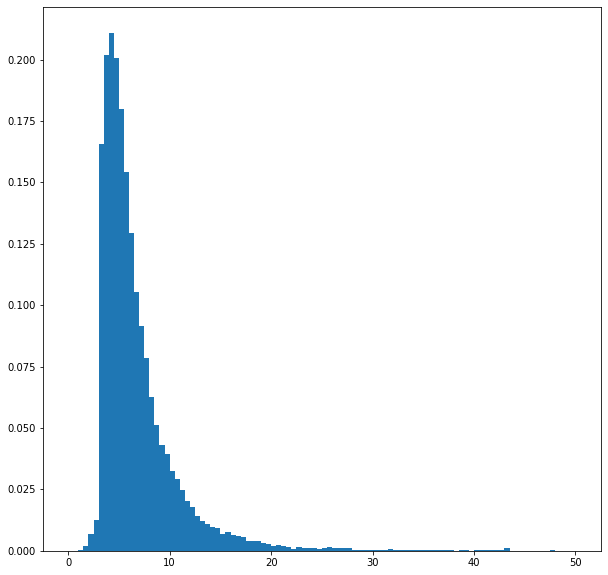

In [10]:
plt.figure(figsize=(10, 10))
plt.hist(decals_dataset[0].petro_theta, density=True, bins=100, range=(0, 50))
plt.show()

In [30]:
len(decals_dataset[0])

100398

In [31]:
decals_dataset[0].drop_duplicates(['ra','dec'], keep=False, inplace=True)

In [32]:
len(decals_dataset[0])

99568

In [9]:
decals_dataset[0].query("ra==225.624158")

,ra,dec,redshift,iauname,petro_theta,petro_th50,petro_th90,elpetro_absmag_r,mag_r,label,func
50937,225.624158,0.128242,0.086066,J150229.94+000738.5,5.028457,2.127303,6.342862,-21.42352,15.655346,0,train
50937,225.624158,0.128242,0.086066,J150229.94+000738.5,5.028457,2.127303,6.342862,-21.42352,15.655346,5,train


In [13]:
ROOT = "/data/renhaoye/decals_2022/"  # 根目录
FUNC = ["train", "test", "valid"]  # 三类数据都做
TAIL = [".fits", "_flipped.fits", "_rotated.fits", "_shifted.fits"]  # 数据增强后缀
AGMTN = [True, False, False, False, False, False, True]  # 数据增强判断

In [14]:
def decals_txt(df_list: list, name):
    for idx in range(len(FUNC)):  # 三类数据共三轮，只有第一轮需要数据增强判断
        with open(ROOT + "dataset_txt/" + name + "-" + FUNC[idx] + ".txt", "w") as w:  # 需要输入txt的特征文件名
            for i in range(len(df_list[idx])):  # 整个df的循环
                label = str(df_list[idx].iloc[i].label)
                if SDSS:
                    temp = str(df_list[idx].iloc[i].sdss_loc).split(".fits")[0].split("/")[-1]
                    ra, dec = temp.split("_")
                else:
                    ra, dec = str(df_list[idx].iloc[i].ra), str(df_list[idx].iloc[i].dec),   # 先拿坐标和标签，这一步仅适用于decals的，sdss匹配的不可以
                if AGMTN[int(label)] and idx == 0:
                    for tail in TAIL:
                        w.write(DATASET_PATH + ra + "_" + dec + tail + " " + str(label) + "\n")
                else:
                    w.write(DATASET_PATH + ra + "_" + dec + TAIL[0] + " " + str(label) +"\n")

In [15]:
train, test, valid = sdss_df.query("func == 'train'"), sdss_df.query("func == 'test'"), sdss_df.query("func == 'valid'")

In [16]:
"""去重之后的"""
for i in range(7):
    print(len(train.query("label == %d" %i)))

2283
16972
18245
11842
7529
9991
1122


In [9]:
for i in range(7):
    print(len(train.query("label == %d" %i)))

2283
16972
18245
11842
7529
9991
1122


In [16]:
"""
数据增强、拉伸过、无恒星蒙版
"""
SDSS = False
DATASET_PATH = ROOT + "in_decals/decals_best/"
decals_txt(decals_dataset, "decals-CLASS_7-BEST")

In [17]:
"""
无数据增强、拉伸过、无恒星蒙版
"""
SDSS = False
AGMTN = [False, False, False, False, False, False, False]  # 数据增强判断
DATASET_PATH = ROOT + "in_decals/decals_NoAgmtn/"
decals_txt(decals_dataset, "decals-CLASS_7-NoAgmtn")

In [35]:
"""
数据增强、拉伸过、恒星蒙版
"""
SDSS = False
AGMTN = [False, False, False, False, False, False, False]  # 数据增强判断
DATASET_PATH = ROOT + "in_decals/decals_masked/"
decals_txt(decals_dataset, "decals-CLASS_7-masked")

In [20]:
from tqdm import tqdm

In [36]:
with open("/data/renhaoye/decals_2022/dataset_txt/decals-CLASS_7-masked-train.txt", "r") as r:
    w = r.readlines()
    for i in range(len(w)):
        if not os.path.exists(w[i].split(" ")[0]):
            print((w[i].split(" ")[0]))

In [5]:
"""
BEST全数据增强
"""
SDSS = False
AGMTN = [True, True, True, True, True, True, True]  # 数据增强判断
DATASET_PATH = ROOT + "in_decals/decals_best/"
decals_txt(decals_dataset, "decals-CLASS_7-best_allAgmtn")

In [19]:
"""
无数据增强、无拉伸过、无恒星蒙版
"""
SDSS = False
AGMTN = [False, False, False, False, False, False, False]  # 数据增强判断
DATASET_PATH = ROOT + "in_decals/decals_baseline/"
decals_txt(decals_dataset, "decals-CLASS_7-baseline")

In [ ]:
SDSS = True
DATASET_PATH = ROOT + "in_decals/sdss_agmtn_scaled/"
decals_txt(sdss_dataset, "sdss-CLASS_7-BEST")

In [8]:
sdss_dataset[2].iloc[1].ra, sdss_dataset[2].iloc[1].dec

(357.901193, -0.98241)

In [58]:
num = []
for i in range(7):
    num.append(len(decals_df.query("func == 'train' and label == %s" % str(i))))
print(num)

[3384, 24737, 26559, 17685, 11540, 14813, 1680]


In [20]:
c = os.listdir("/data/renhaoye/decals_2022/in_decals/decals_baseline/")
a = c.sort()

FileNotFoundError: [Errno 2] No such file or directory: '/data/renhaoye/decals_2022/in_decals/decals_baseline/'

In [14]:
sdss_dataset[0].head()

,sdss_ra,sdss_dec,ra,dec,redshift,iauname,petro_theta,petro_th50,petro_th90,elpetro_absmag_r,mag_r,label,func,sdss_loc
0,190.389330,12.412536,190.389350,12.412523,0.095130,J124133.43+122445.1,5.648035,2.633897,7.190163,-20.850252,16.369423,0,train,/data/renhaoye/sdss_dr7_decals_overlap/scaled/...
1,150.776340,13.091443,150.776372,13.091446,0.084145,J100306.31+130529.1,7.833712,3.841845,8.523943,-21.379004,15.812620,0,train,/data/renhaoye/sdss_dr7_decals_overlap/scaled/...
2,155.325830,9.407741,155.325840,9.407750,0.071703,J102118.20+092427.8,7.674768,3.647288,11.196910,-20.806263,15.722494,0,train,/data/renhaoye/sdss_dr7_decals_overlap/scaled/...
3,145.393033,13.637970,145.393076,13.637963,0.127877,J094134.33+133816.6,12.730249,5.135739,15.805613,-21.242468,17.109924,0,train,/data/renhaoye/sdss_dr7_decals_overlap/scaled/...
4,337.545973,-0.153992,337.545979,-0.153999,0.088534,J223011.03-000914.3,5.956107,3.149063,5.898870,-20.838923,16.518898,0,train,/data/renhaoye/sdss_dr7_decals_overlap/scaled/...


In [27]:
from astropy.io import fits
from astropy.wcs import WCS

In [28]:
with fits.open("/data/renhaoye/sdss_dr7_decals_overlap/scaled/190.38933_12.412536.fits") as hdul:
    wcs = WCS(hdul[0].header)

In [37]:
wcs.wcs_pix2world()

TypeError: WCS projection has 3 dimensions, so expected 2 (an Nx3 array and the origin argument) or 4 arguments (the position in each dimension, and the origin argument). Instead, 0 arguments were given.